<a href="https://colab.research.google.com/github/zyf2021/-/blob/main/EfficientNet_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

# Загрузка предварительно обученной модели EfficientNet-B0
model = models.efficientnet_b0(pretrained=True)
model.eval()  # Установка режима оценки (evaluation mode)

# Преобразование входного изображения
transform = transforms.Compose([
    transforms.Resize(256),  # Масштабирование изображения до 256x256
    transforms.CenterCrop(224),  # Обрезка изображения до размера 224x224
    transforms.ToTensor(),  # Преобразование изображения в тензор
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализация значений пикселей
])




In [7]:
# Загрузка меток классов
class_idx = json.load(open('imagenet_class_index.json'))

In [ ]:
class_idx

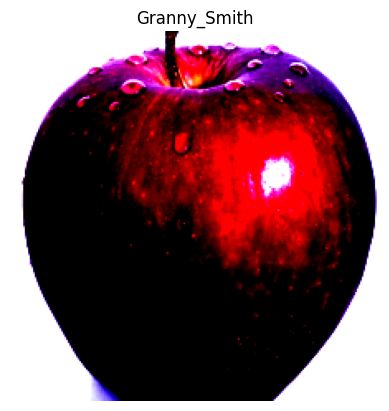

Predicted class: Granny_Smith


IndexError: too many indices for tensor of dimension 1

In [15]:
# Загрузка и обработка входного изображения
image_path = '/content/apple.jpg'
image = Image.open(image_path)
image = transform(image).unsqueeze(0)  # Добавление размерности пакета

# Подача изображения на вход модели
with torch.no_grad():
    outputs = model(image)

# Получение предсказания
probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
predicted_class_idx = torch.argmax(probabilities).item()
predicted_class = class_idx[str(predicted_class_idx)][1]


# Изменение формата изображения для отображения в Matplotlib
image_np = image.squeeze(0).permute(1, 2, 0).numpy()

# Вывод изображения и предсказанного класса
plt.imshow(image_np)
plt.axis('off')
plt.title(predicted_class)
plt.show()


# Вывод результата
print("Predicted class:", predicted_class)
print("Probability:", probabilities[predicted_class].item())